In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor

#data from https://www.kaggle.com/datasets/mitishaagarwal/patient
patient_data = pd.read_csv('dataset.csv')

In [2]:
patient_data

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Unnamed: 83,hospital_death
0,66154,25312,118,68.0,22.730000,0,Caucasian,M,180.3,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
1,114252,59342,81,77.0,27.420000,0,Caucasian,F,160.0,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0
2,119783,50777,118,25.0,31.950000,0,Caucasian,F,172.7,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
3,79267,46918,118,81.0,22.640000,1,Caucasian,F,165.1,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,0
4,92056,34377,33,19.0,NaN,0,Caucasian,M,188.0,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,91592,78108,30,75.0,23.060250,0,Caucasian,M,177.8,Floor,...,1.0,0.0,0.0,0.0,0.0,1.0,Sepsis,Cardiovascular,NaN,0
91709,66119,13486,121,56.0,47.179671,0,Caucasian,F,183.0,Floor,...,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
91710,8981,58179,195,48.0,27.236914,0,Caucasian,M,170.2,Accident & Emergency,...,1.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
91711,33776,120598,66,NaN,23.297481,0,Caucasian,F,154.9,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0


In [28]:
patient_data

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,h1_heartrate_dif,d1_heartrate_dif,d1_mbp_dif,h1_mbp_dif,h1_resprate_dif,d1_resprate_dif,d1_temp_dif,d1_glucose_dif,d1_potassium_dif,h1_spo2_dif
0,66154,25312,118,68.0,22.730000,0,Caucasian,M,180.3,Floor,...,11.0,47.0,43.0,1.0,8.0,24.0,2.7,59.0,0.6,26.0
1,114252,59342,81,77.0,27.420000,0,Caucasian,F,160.0,Floor,...,14.0,46.0,82.0,28.0,3.0,20.0,1.2,17.0,0.4,25.0
2,119783,50777,118,25.0,31.950000,0,Caucasian,F,172.7,Accident & Emergency,...,18.0,28.0,34.0,8.0,4.0,13.0,0.3,NaN,NaN,7.0
3,79267,46918,118,81.0,22.640000,1,Caucasian,F,165.1,Operating Room / Recovery,...,4.0,24.0,0.0,21.0,1.0,16.0,3.2,97.0,1.5,1.0
4,92056,34377,33,19.0,NaN,0,Caucasian,M,188.0,Accident & Emergency,...,13.0,29.0,14.0,12.0,NaN,2.0,0.5,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,91592,78108,30,75.0,23.060250,0,Caucasian,M,177.8,Floor,...,15.0,45.0,61.0,9.0,8.0,18.0,1.6,213.0,0.0,1.0
91709,66119,13486,121,56.0,47.179671,0,Caucasian,F,183.0,Floor,...,6.0,24.0,35.0,10.0,6.0,21.0,1.3,0.0,0.0,3.0
91710,8981,58179,195,48.0,27.236914,0,Caucasian,M,170.2,Accident & Emergency,...,NaN,79.0,25.0,NaN,NaN,34.0,1.1,452.0,1.5,NaN
91711,33776,120598,66,NaN,23.297481,0,Caucasian,F,154.9,Accident & Emergency,...,NaN,22.0,54.0,NaN,NaN,9.0,0.2,NaN,NaN,NaN


In [31]:
dif = ['h1_heartrate_dif', 'd1_heartrate_dif', 'd1_mbp_dif', 'h1_mbp_dif','h1_resprate_dif','d1_resprate_dif', 
       'd1_temp_dif', 'd1_glucose_dif', 'd1_potassium_dif','h1_spo2_dif'] 

In [3]:
# These are the names of the columns in the data set
for col in patient_data.columns:
    print(col)

encounter_id
patient_id
hospital_id
age
bmi
elective_surgery
ethnicity
gender
height
icu_admit_source
icu_id
icu_stay_type
icu_type
pre_icu_los_days
weight
apache_2_diagnosis
apache_3j_diagnosis
apache_post_operative
arf_apache
gcs_eyes_apache
gcs_motor_apache
gcs_unable_apache
gcs_verbal_apache
heart_rate_apache
intubated_apache
map_apache
resprate_apache
temp_apache
ventilated_apache
d1_diasbp_max
d1_diasbp_min
d1_diasbp_noninvasive_max
d1_diasbp_noninvasive_min
d1_heartrate_max
d1_heartrate_min
d1_mbp_max
d1_mbp_min
d1_mbp_noninvasive_max
d1_mbp_noninvasive_min
d1_resprate_max
d1_resprate_min
d1_spo2_max
d1_spo2_min
d1_sysbp_max
d1_sysbp_min
d1_sysbp_noninvasive_max
d1_sysbp_noninvasive_min
d1_temp_max
d1_temp_min
h1_diasbp_max
h1_diasbp_min
h1_diasbp_noninvasive_max
h1_diasbp_noninvasive_min
h1_heartrate_max
h1_heartrate_min
h1_mbp_max
h1_mbp_min
h1_mbp_noninvasive_max
h1_mbp_noninvasive_min
h1_resprate_max
h1_resprate_min
h1_spo2_max
h1_spo2_min
h1_sysbp_max
h1_sysbp_min
h1_sysbp_

In [4]:
# This is the number of columns
print(len(patient_data.columns))

85


In [5]:
# There are two types of categorical variables. Nominal and Ordinal
# Nominal: two or more categories with no associated order
# Ordinal: two or more categories with an associated order/level hierarchy

In [6]:
# These are the columns with missing values within the data set
col_with_missing = [col for col in patient_data.columns if patient_data[col].isnull().any()]
print(col_with_missing)

['age', 'bmi', 'ethnicity', 'gender', 'height', 'icu_admit_source', 'weight', 'apache_2_diagnosis', 'apache_3j_diagnosis', 'arf_apache', 'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_unable_apache', 'gcs_verbal_apache', 'heart_rate_apache', 'intubated_apache', 'map_apache', 'resprate_apache', 'temp_apache', 'ventilated_apache', 'd1_diasbp_max', 'd1_diasbp_min', 'd1_diasbp_noninvasive_max', 'd1_diasbp_noninvasive_min', 'd1_heartrate_max', 'd1_heartrate_min', 'd1_mbp_max', 'd1_mbp_min', 'd1_mbp_noninvasive_max', 'd1_mbp_noninvasive_min', 'd1_resprate_max', 'd1_resprate_min', 'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_max', 'd1_sysbp_min', 'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min', 'd1_temp_max', 'd1_temp_min', 'h1_diasbp_max', 'h1_diasbp_min', 'h1_diasbp_noninvasive_max', 'h1_diasbp_noninvasive_min', 'h1_heartrate_max', 'h1_heartrate_min', 'h1_mbp_max', 'h1_mbp_min', 'h1_mbp_noninvasive_max', 'h1_mbp_noninvasive_min', 'h1_resprate_max', 'h1_resprate_min', 'h1_spo2_max', 'h1_spo2_

In [7]:
# number of columns with missing values
len(col_with_missing)

75

In [8]:
#Provides list of catergorical variables
s = (patient_data.dtypes == 'object')
object_cols = list(s[s].index)

print('Categorical Variables:')
print(object_cols)

Categorical Variables:
['ethnicity', 'gender', 'icu_admit_source', 'icu_stay_type', 'icu_type', 'apache_3j_bodysystem', 'apache_2_bodysystem']


In [9]:
#Provides list of numerical variables
numerical_cols = [cname for cname in patient_data.columns if patient_data[cname].dtype in ['int64', 'float64']]
numerical_cols

['encounter_id',
 'patient_id',
 'hospital_id',
 'age',
 'bmi',
 'elective_surgery',
 'height',
 'icu_id',
 'pre_icu_los_days',
 'weight',
 'apache_2_diagnosis',
 'apache_3j_diagnosis',
 'apache_post_operative',
 'arf_apache',
 'gcs_eyes_apache',
 'gcs_motor_apache',
 'gcs_unable_apache',
 'gcs_verbal_apache',
 'heart_rate_apache',
 'intubated_apache',
 'map_apache',
 'resprate_apache',
 'temp_apache',
 'ventilated_apache',
 'd1_diasbp_max',
 'd1_diasbp_min',
 'd1_diasbp_noninvasive_max',
 'd1_diasbp_noninvasive_min',
 'd1_heartrate_max',
 'd1_heartrate_min',
 'd1_mbp_max',
 'd1_mbp_min',
 'd1_mbp_noninvasive_max',
 'd1_mbp_noninvasive_min',
 'd1_resprate_max',
 'd1_resprate_min',
 'd1_spo2_max',
 'd1_spo2_min',
 'd1_sysbp_max',
 'd1_sysbp_min',
 'd1_sysbp_noninvasive_max',
 'd1_sysbp_noninvasive_min',
 'd1_temp_max',
 'd1_temp_min',
 'h1_diasbp_max',
 'h1_diasbp_min',
 'h1_diasbp_noninvasive_max',
 'h1_diasbp_noninvasive_min',
 'h1_heartrate_max',
 'h1_heartrate_min',
 'h1_mbp_max',
 

In [10]:
nominal_cat = ['ethnicity', 'gender', 'icu_admit_source', 'icu_stay_type', 'icu_type', 
               'apache_3j_bodysystem', 'apache_2_bodysystem']

In [11]:
#apache associated variables
apache = ['apache_2_diagnosis',
 'apache_3j_diagnosis',
 'apache_post_operative',
 'arf_apache',
 'gcs_eyes_apache',
 'gcs_motor_apache',
 'gcs_unable_apache',
 'gcs_verbal_apache',
 'heart_rate_apache',
 'intubated_apache',
 'map_apache',
 'resprate_apache',
 'temp_apache',
 'ventilated_apache',
'apache_4a_hospital_death_prob',
 'apache_4a_icu_death_prob']

In [12]:
# Making new variables
patient_data = patient_data.assign()

# Light Data Exploratory

In [27]:
# making new variables based on difference between max and min



patient_data['h1_heartrate_dif'] = patient_data['h1_heartrate_max'] - patient_data['h1_heartrate_min']
patient_data['d1_heartrate_dif'] = patient_data['d1_heartrate_max'] - patient_data['d1_heartrate_min']
patient_data['d1_mbp_dif'] = patient_data['d1_mbp_max'] - patient_data['d1_mbp_min']
patient_data['h1_mbp_dif'] = patient_data['h1_mbp_max'] - patient_data['h1_mbp_min']
patient_data['h1_resprate_dif'] = patient_data['h1_resprate_max'] - patient_data['h1_resprate_min']
patient_data['d1_resprate_dif'] = patient_data['d1_resprate_max'] - patient_data['d1_resprate_min']
patient_data['d1_temp_dif'] = patient_data['d1_temp_max'] - patient_data['d1_temp_min']
patient_data['d1_glucose_dif'] = patient_data['d1_glucose_max'] - patient_data['d1_glucose_min']
patient_data['d1_potassium_dif'] = patient_data['d1_potassium_max'] - patient_data['d1_potassium_min']
patient_data['h1_spo2_dif'] = patient_data['h1_spo2_max'] - patient_data['h1_spo2_min']

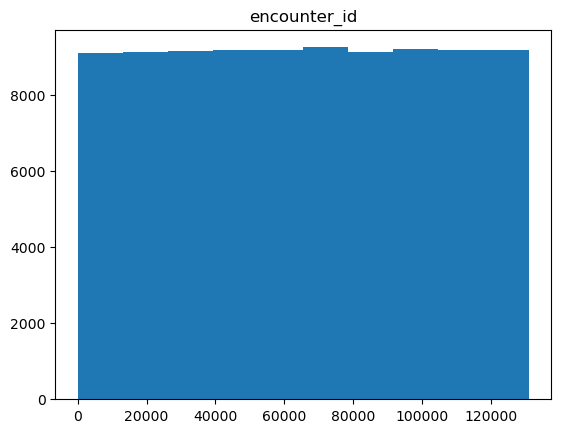

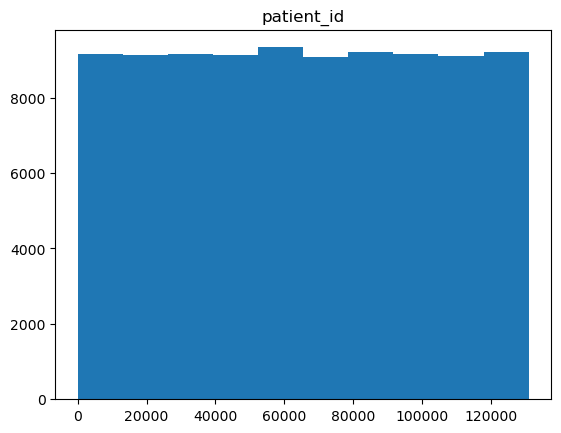

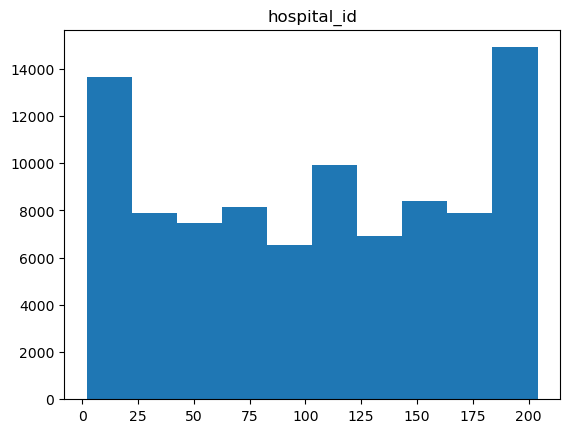

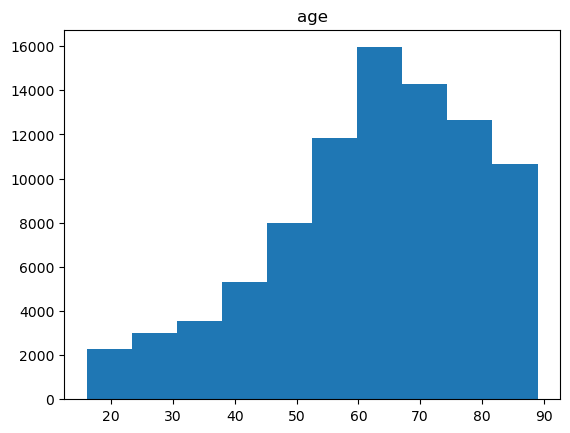

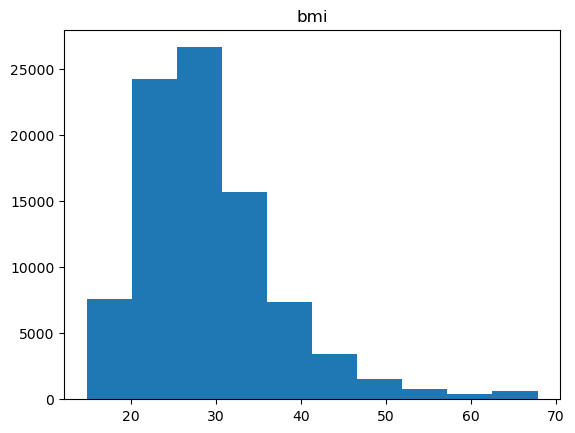

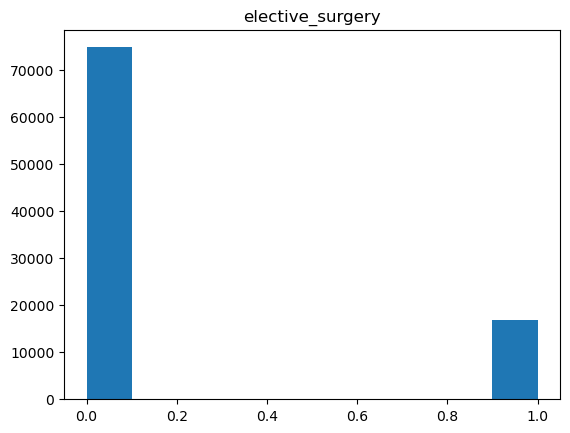

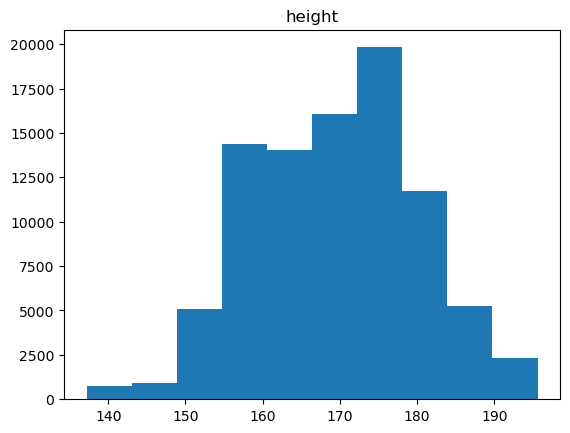

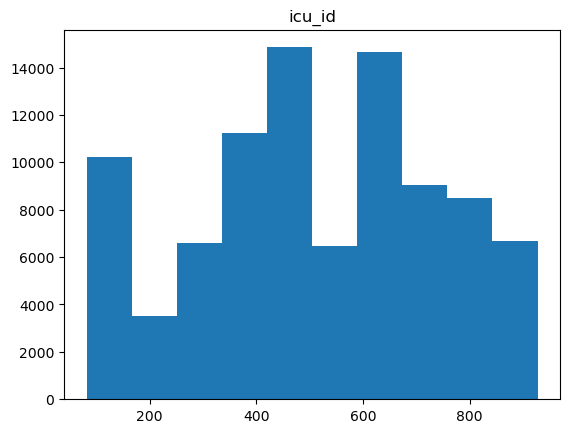

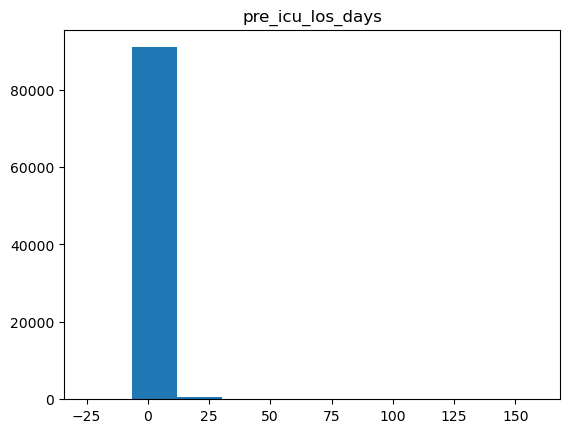

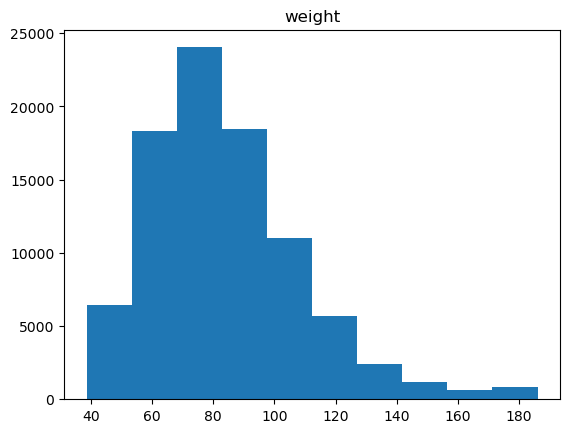

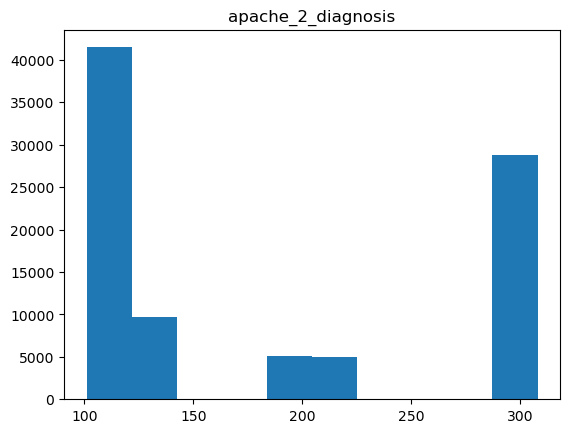

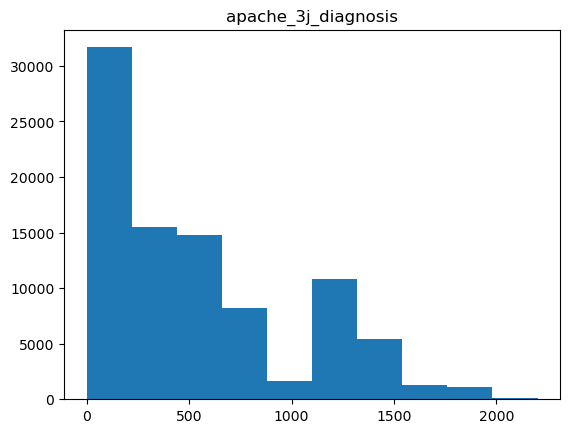

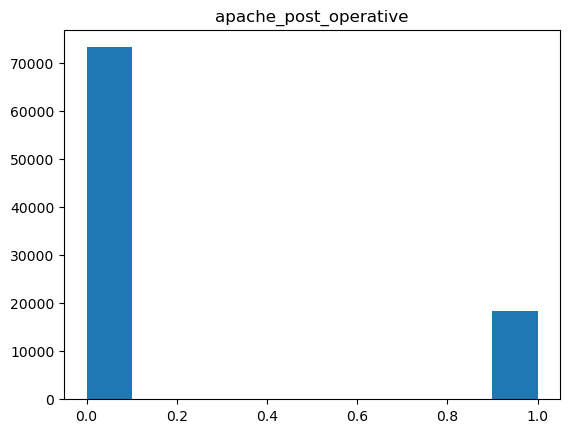

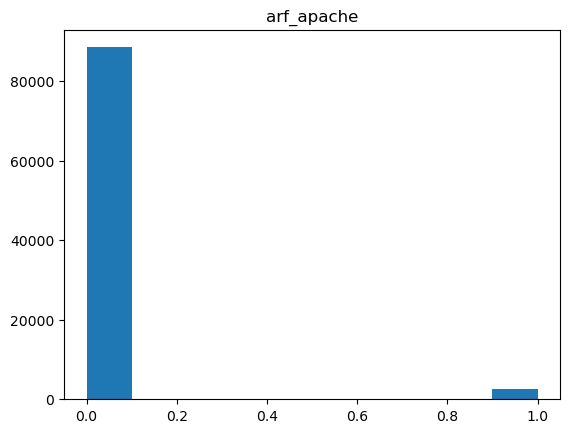

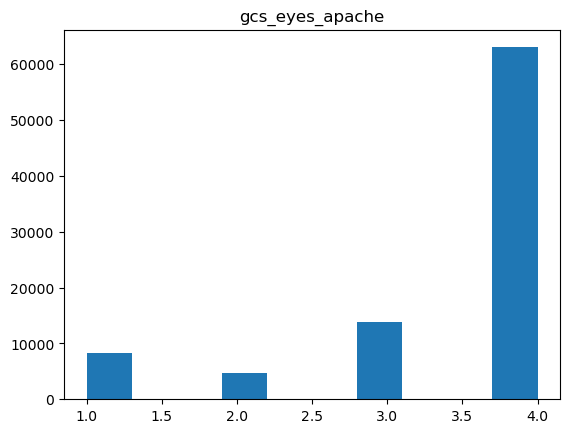

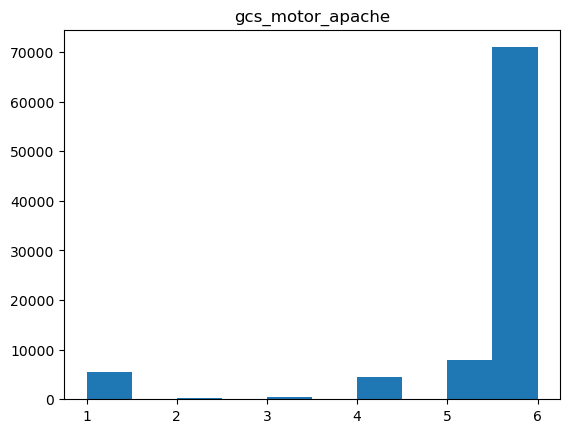

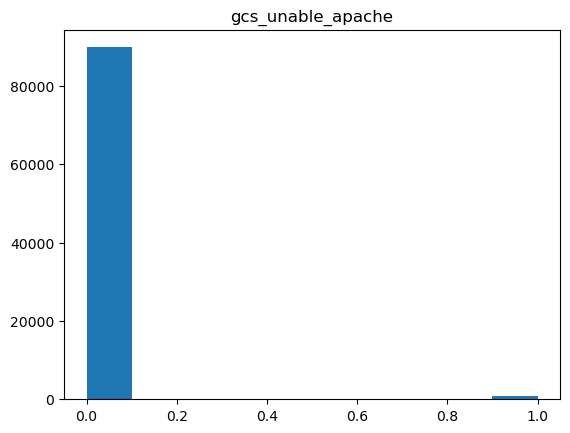

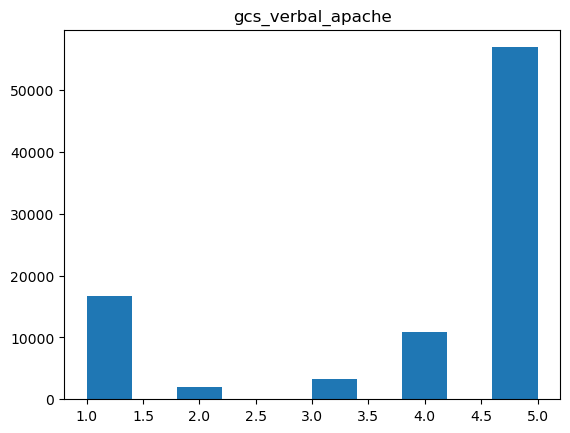

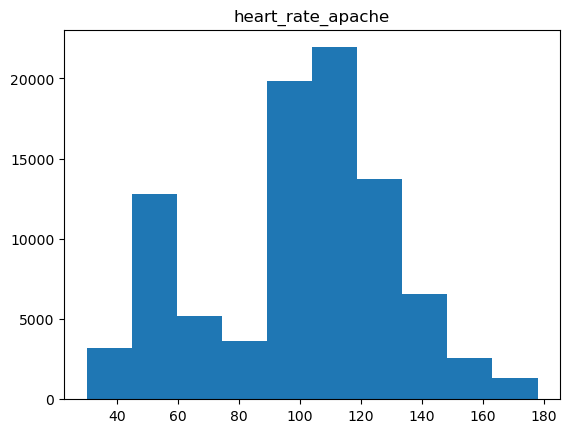

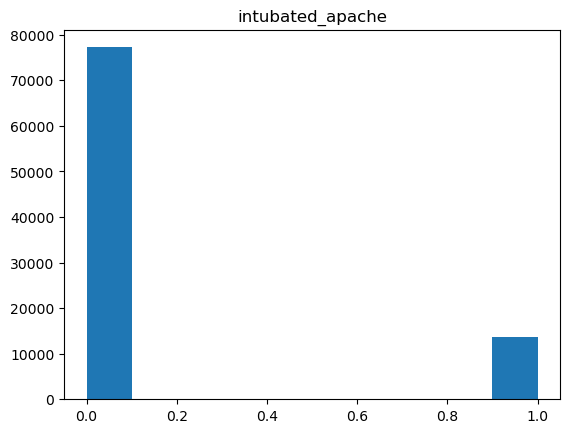

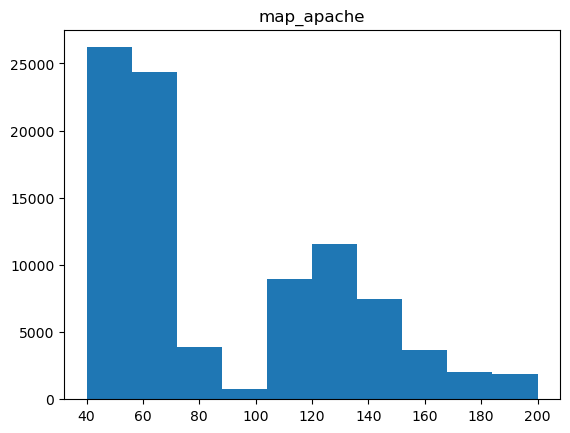

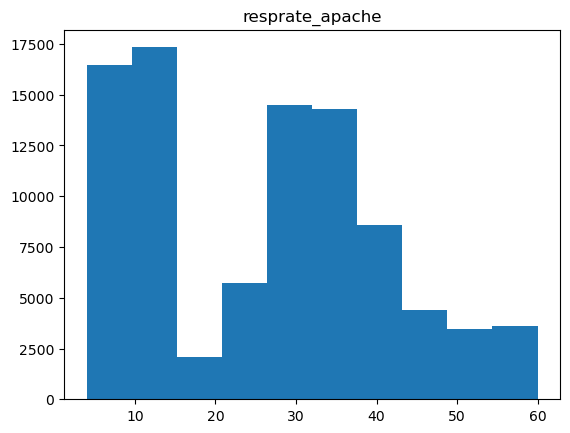

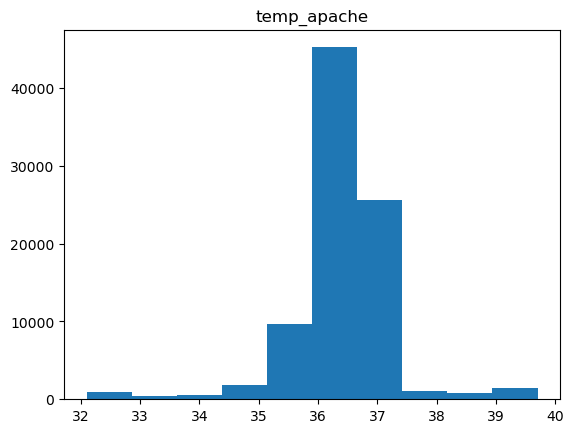

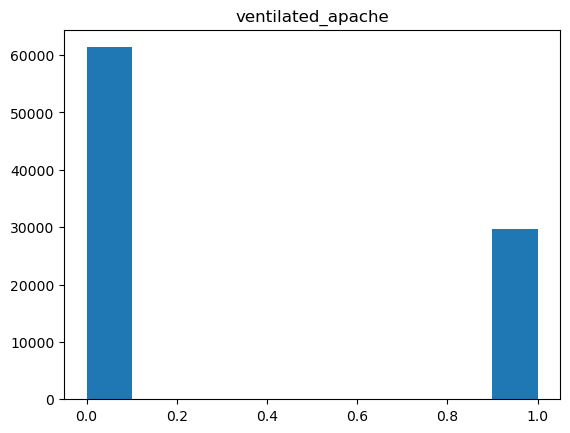

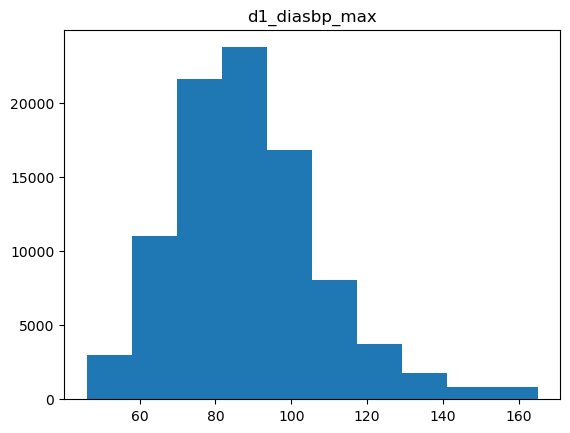

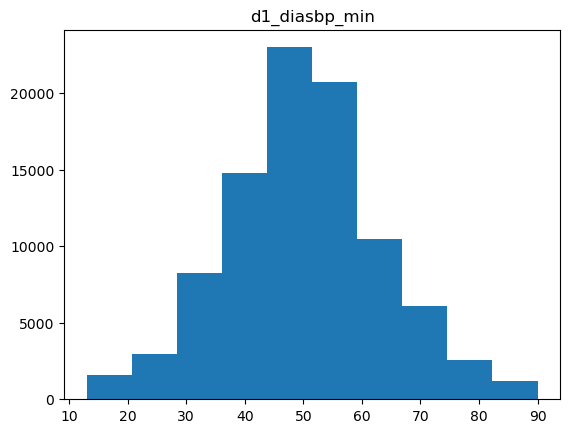

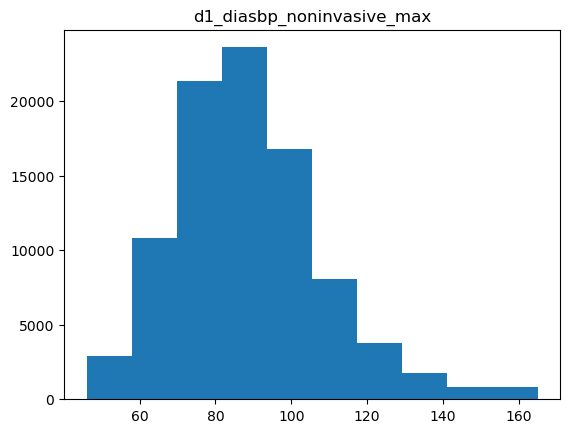

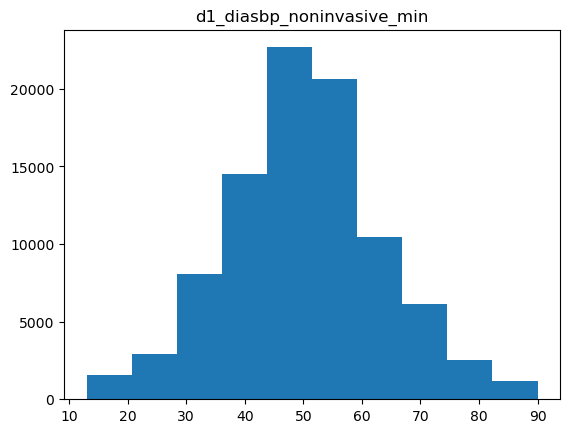

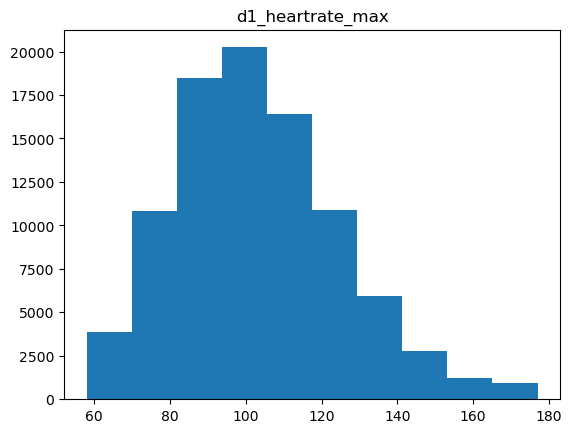

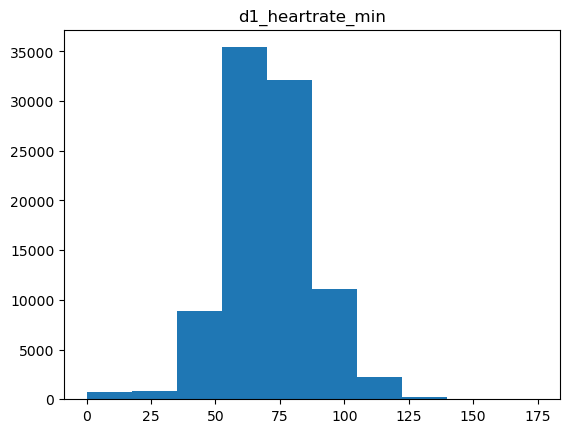

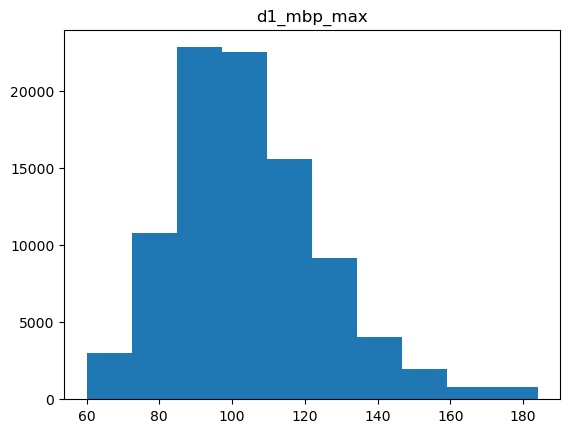

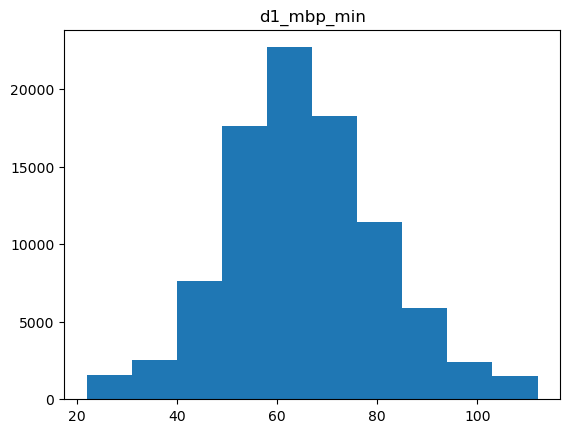

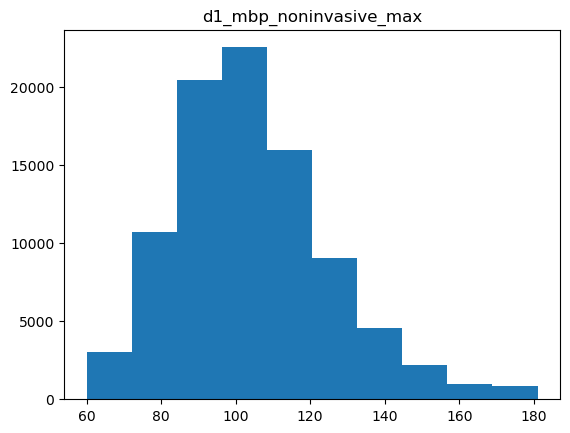

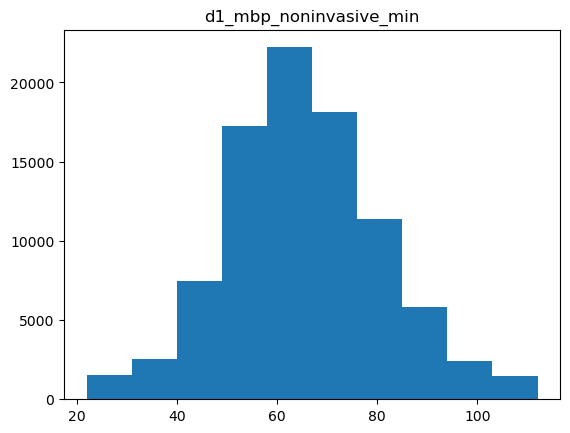

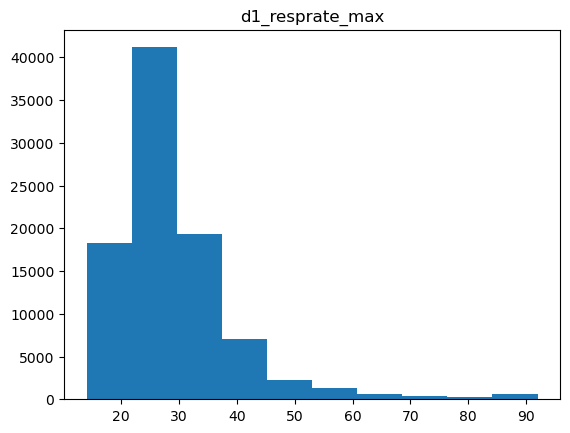

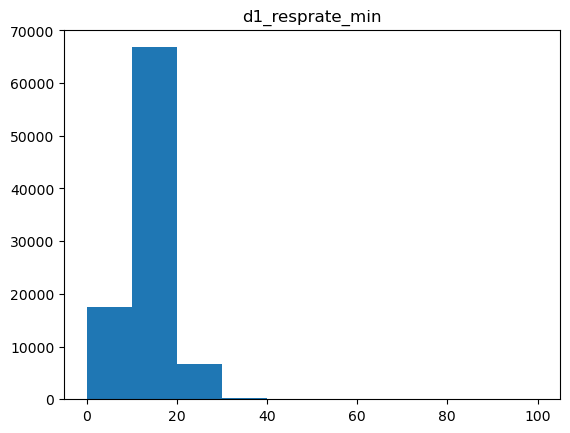

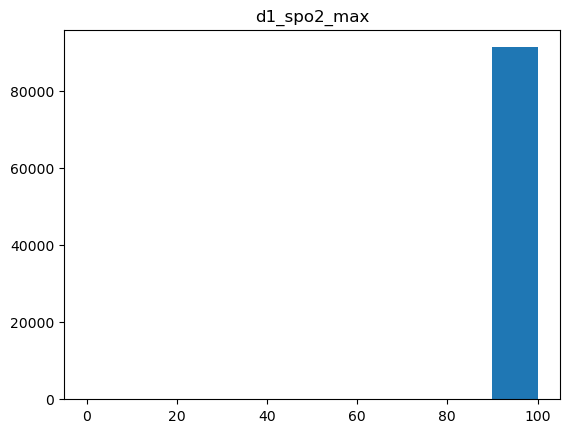

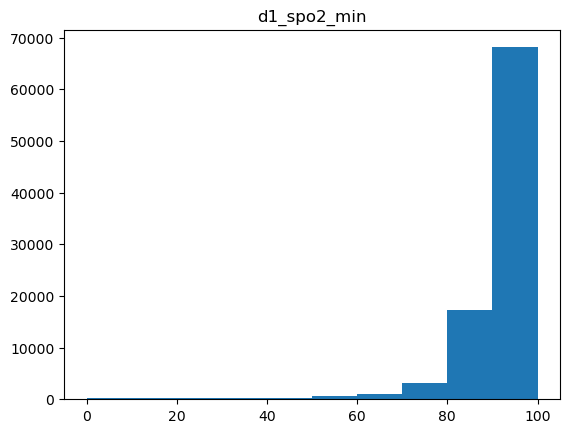

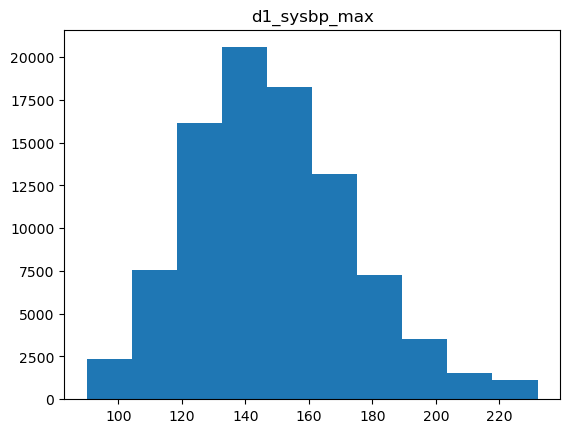

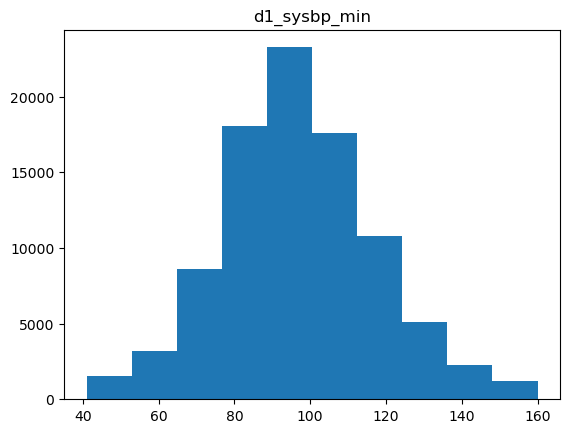

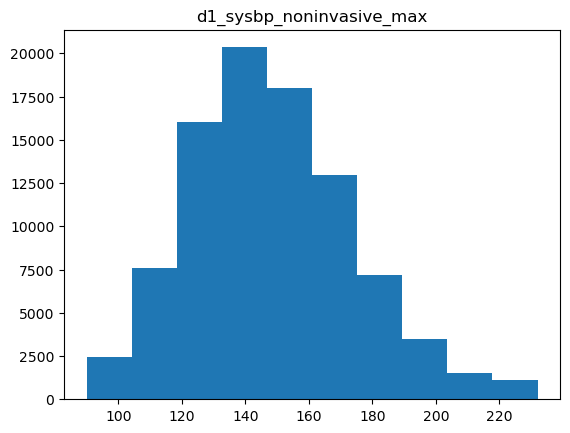

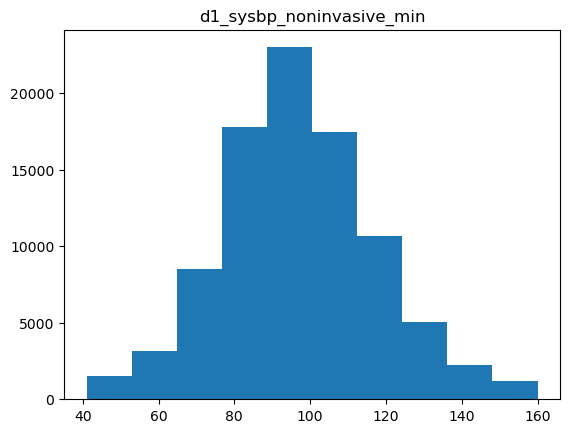

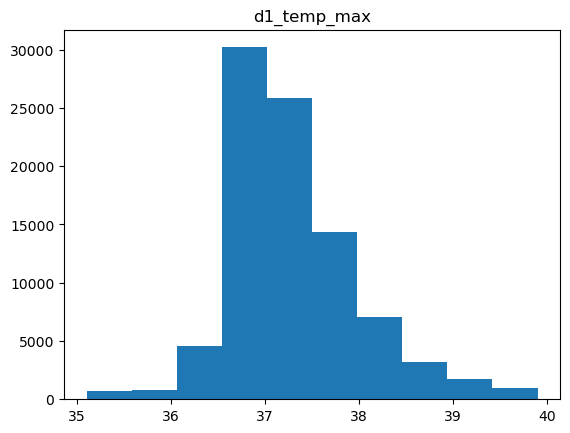

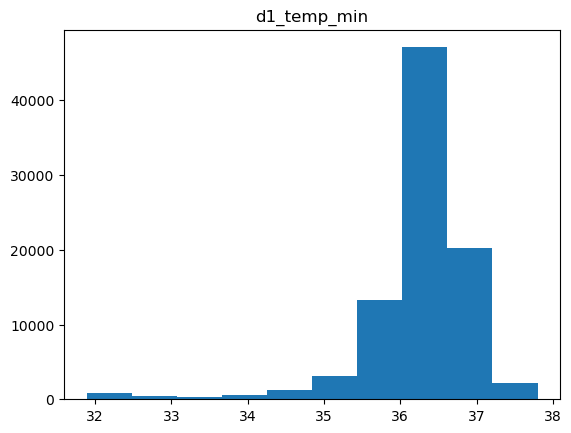

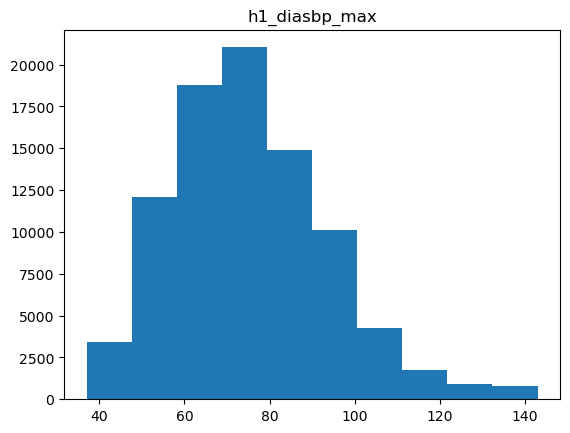

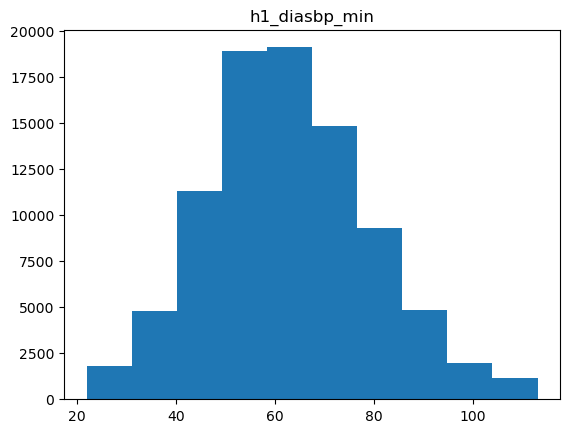

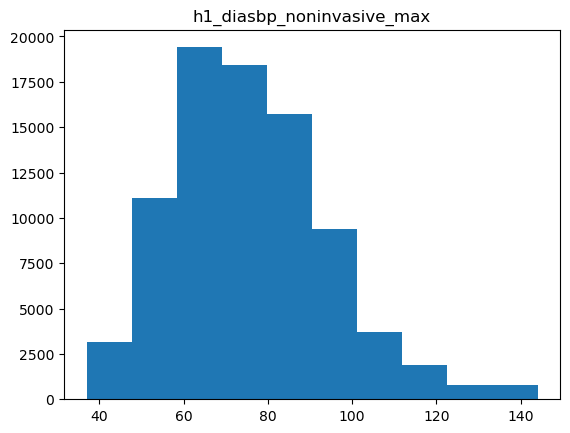

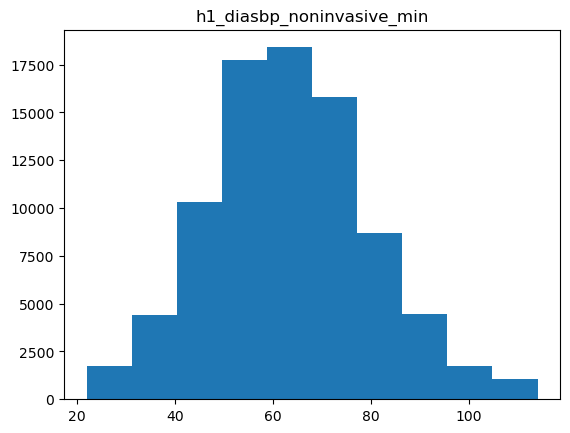

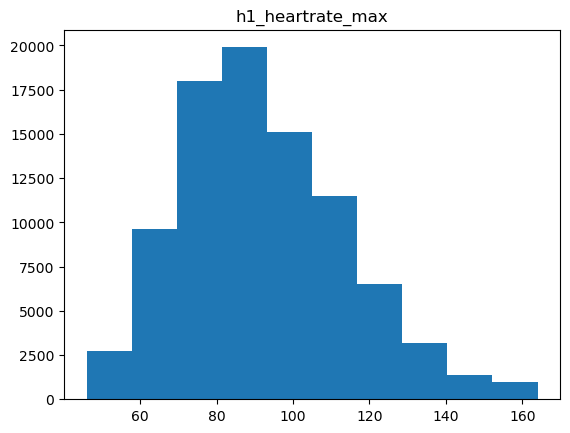

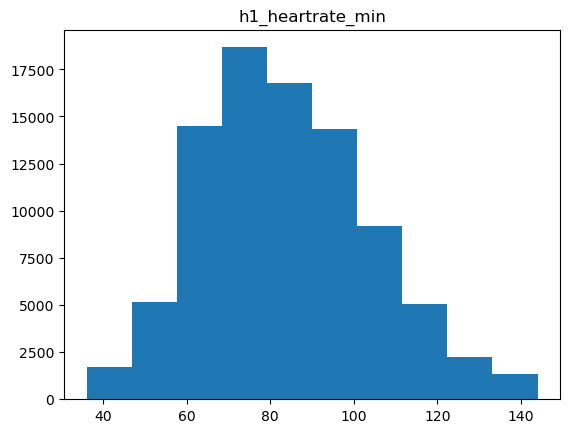

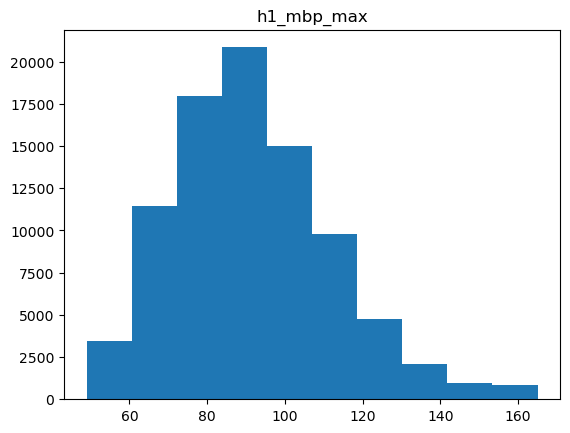

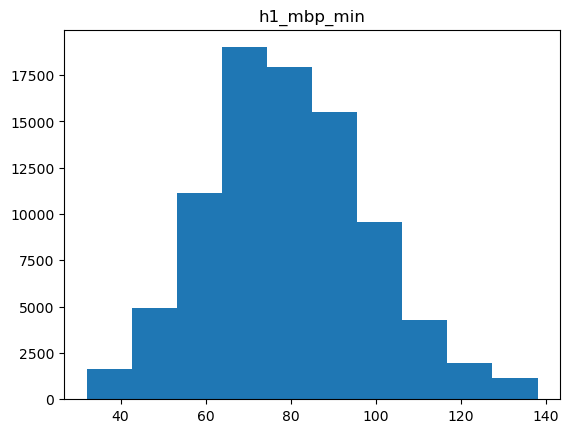

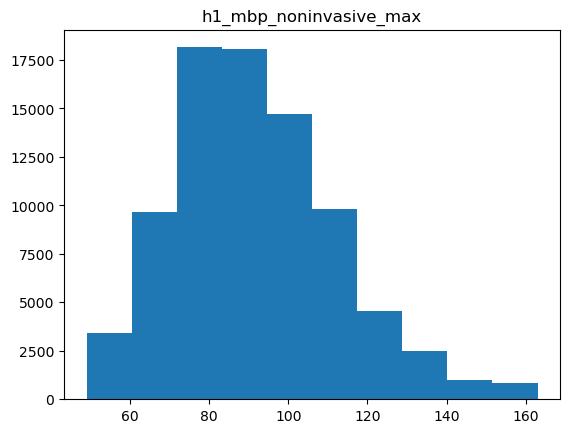

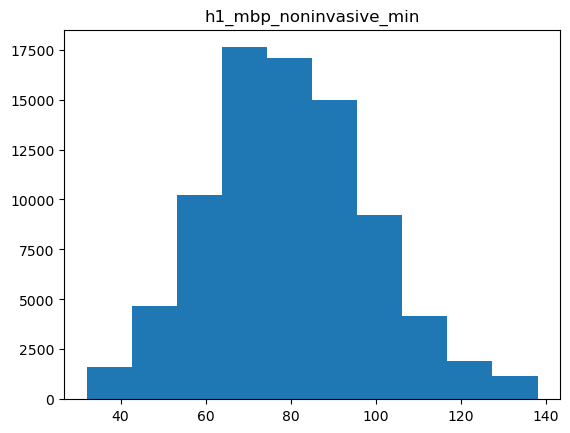

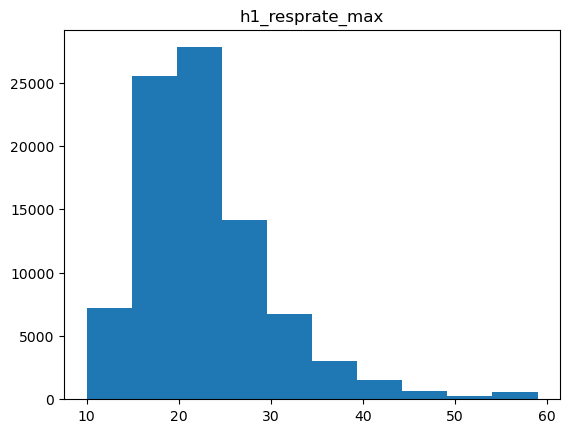

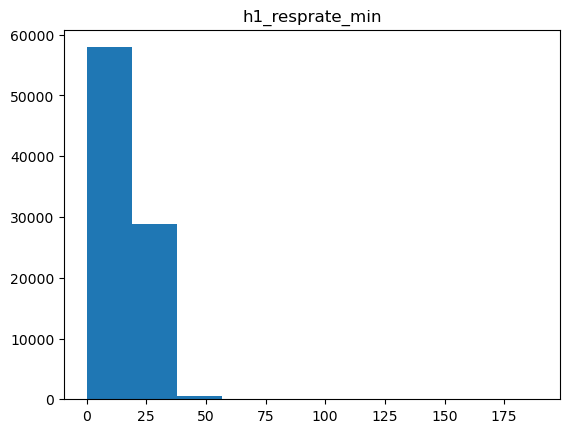

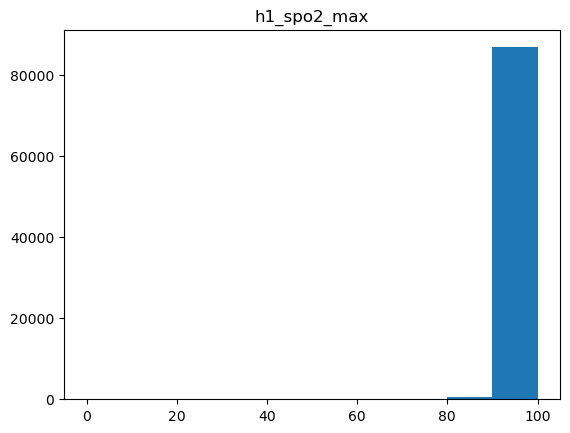

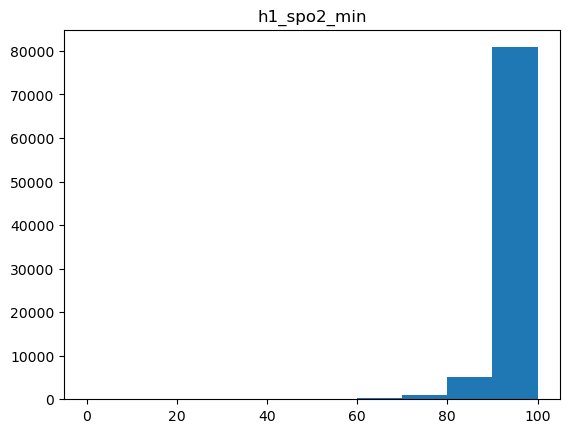

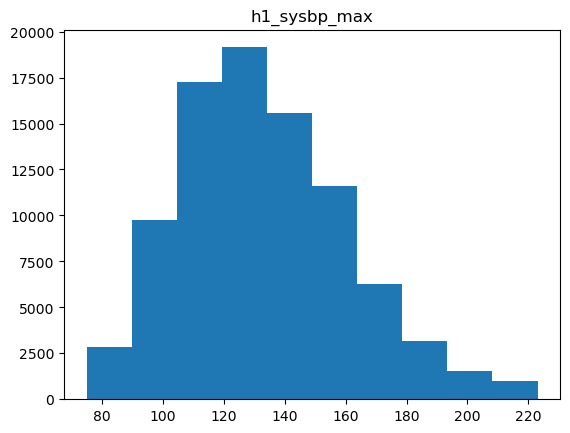

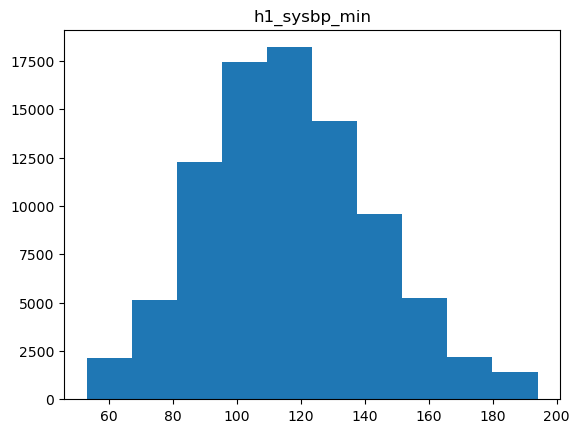

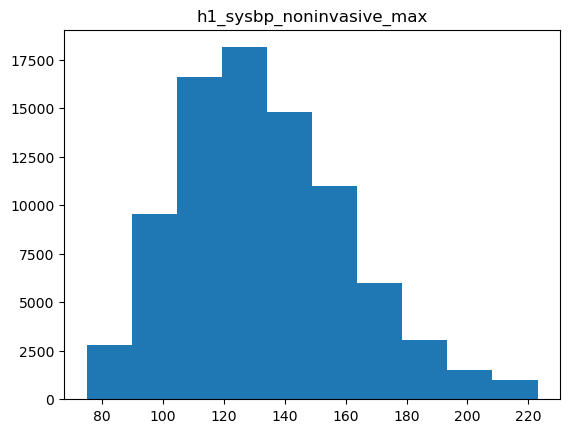

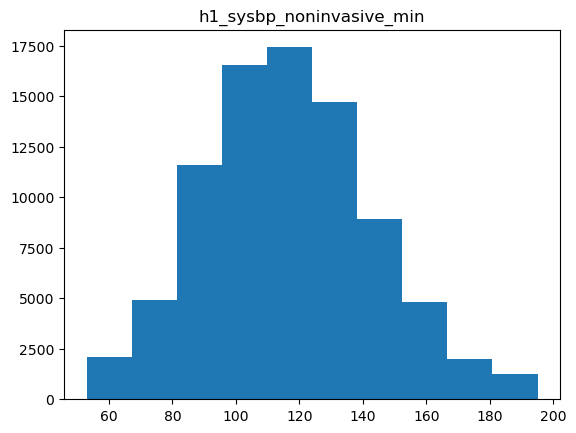

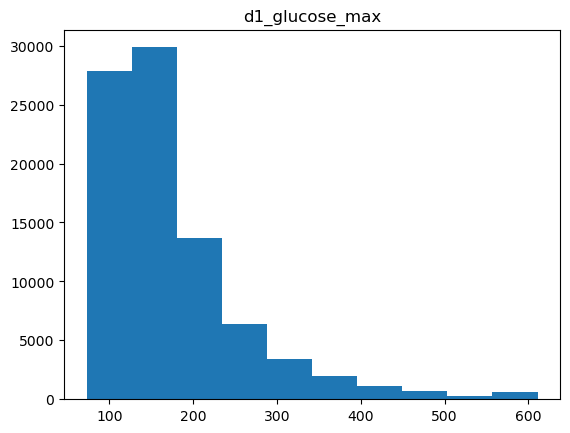

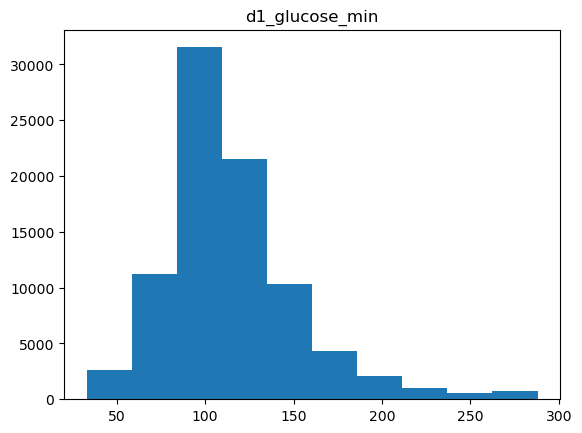

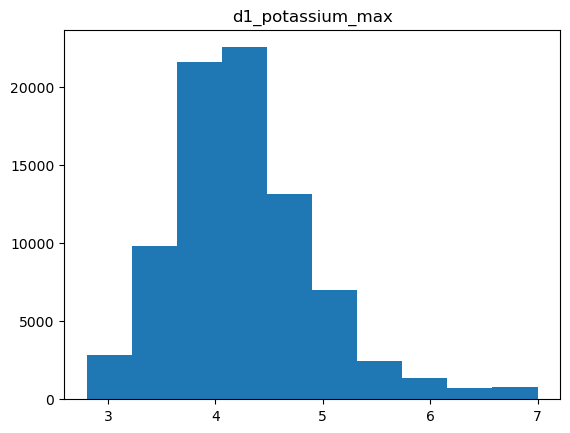

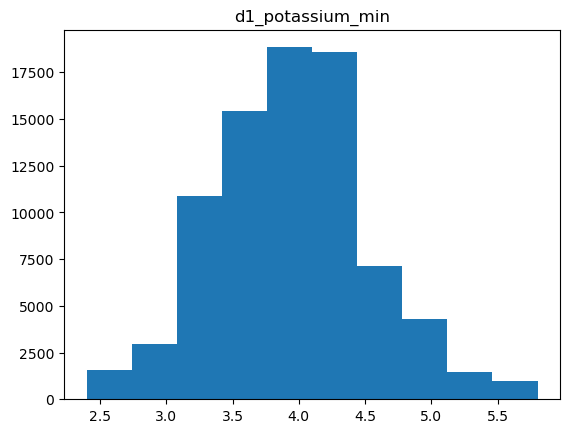

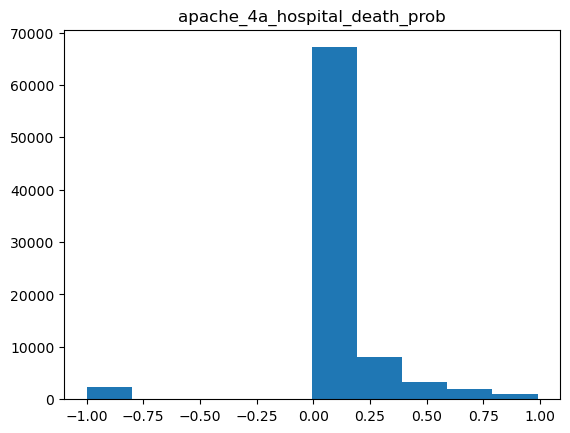

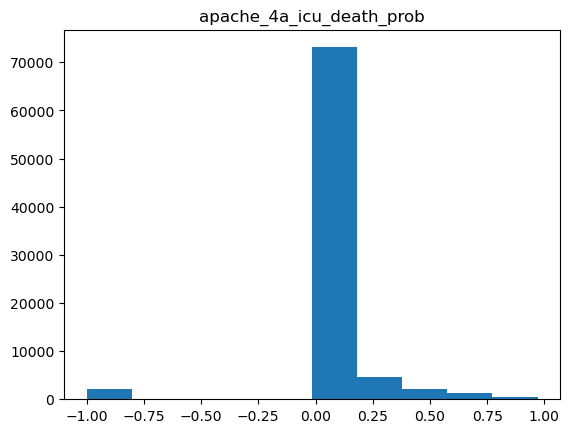

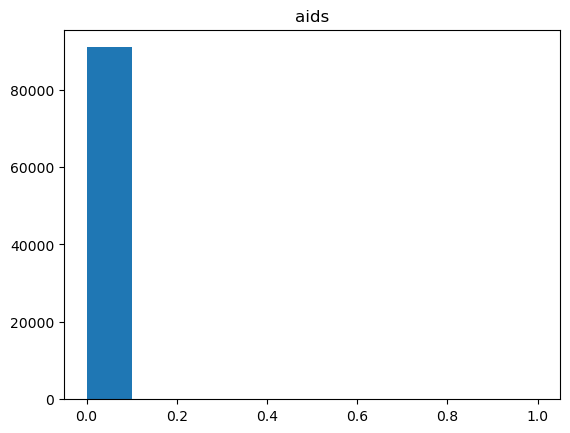

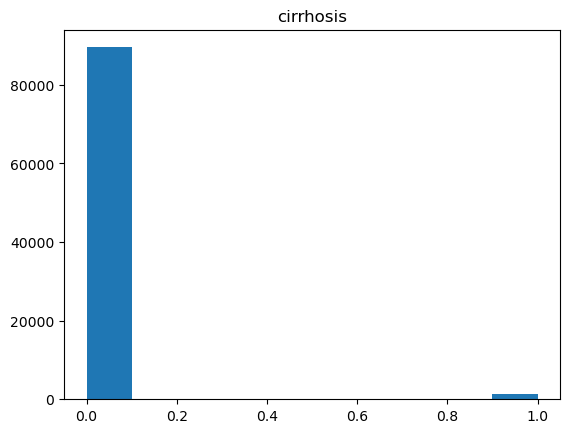

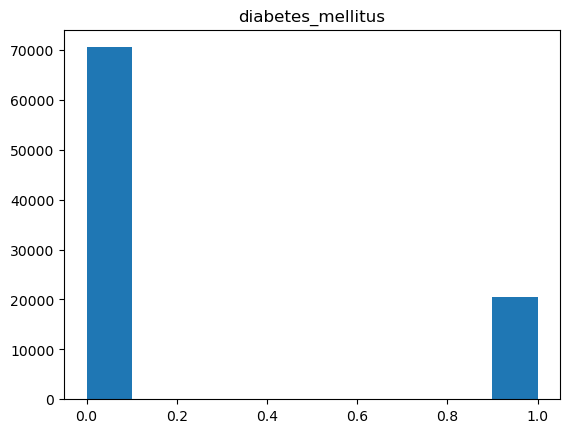

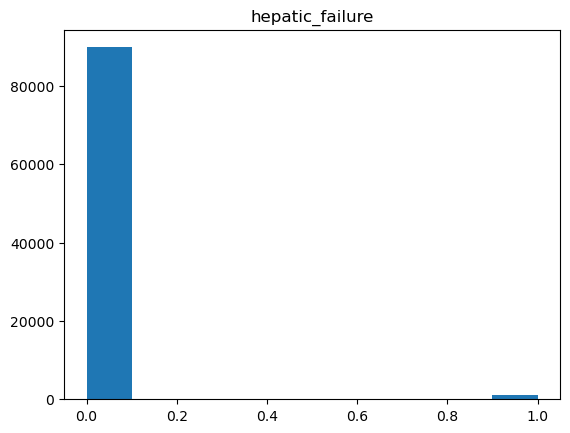

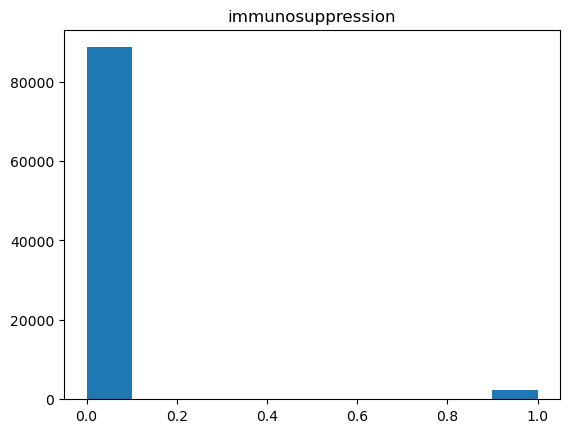

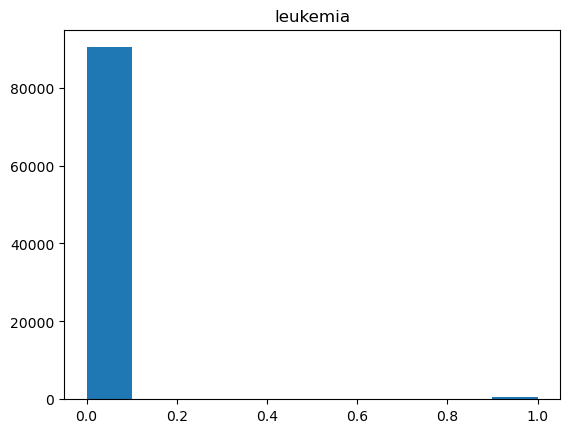

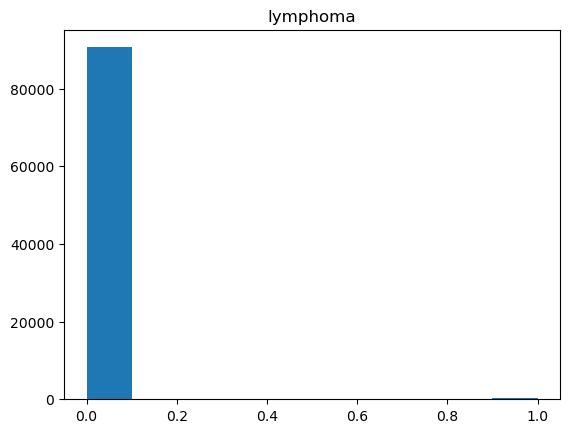

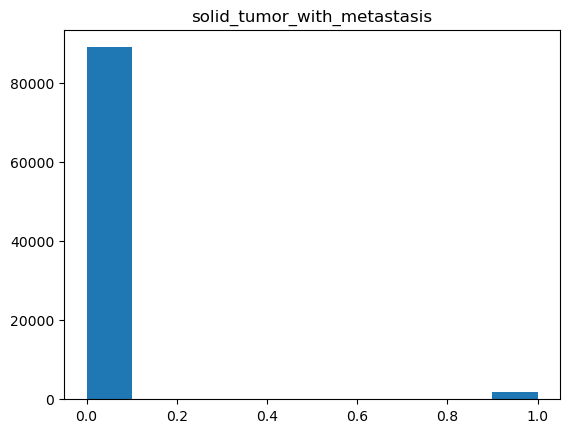

/Users/laolucharles1/anaconda3/lib/python3.10/site-packages/matplotlib/axes/_axes.py:6762: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/Users/laolucharles1/anaconda3/lib/python3.10/site-packages/matplotlib/axes/_axes.py:6763: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


ValueError: autodetected range of [nan, nan] is not finite

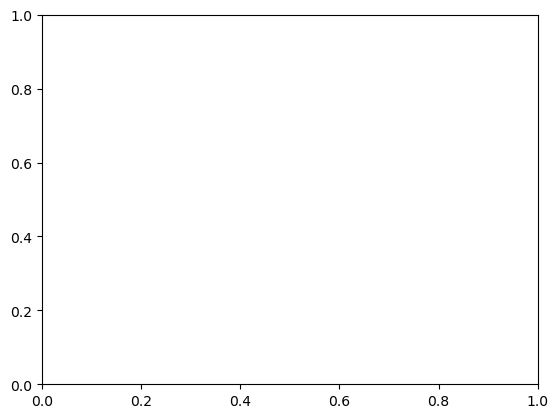

In [13]:
for var in numerical_cols:
    plt.hist(patient_data['' + var])
    plt.title(var)
    plt.show()
   

<Axes: >

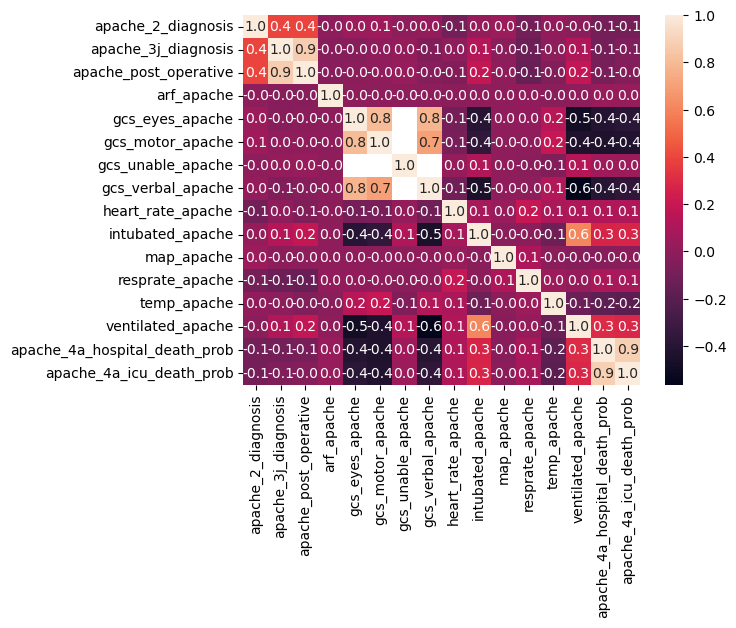

In [22]:
#Apache Correlation Plot
sns.heatmap(patient_data[apache].corr(), annot = True, fmt=".1f")

<Axes: >

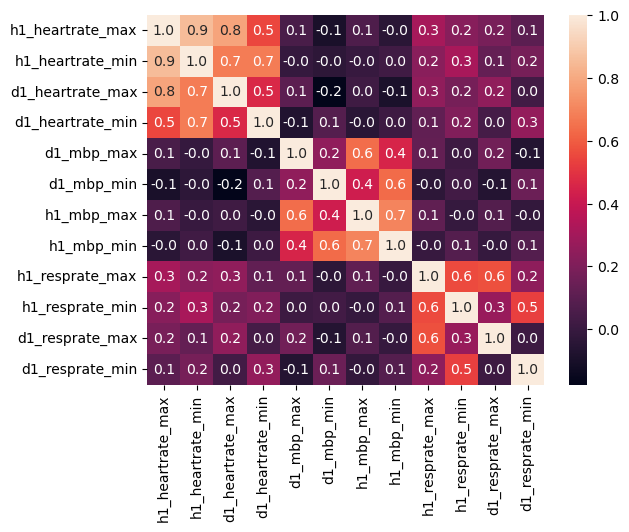

In [24]:
a = ['h1_heartrate_max', 'h1_heartrate_min', 'd1_heartrate_max', 'd1_heartrate_min', 'd1_mbp_max', 'd1_mbp_min',
    'h1_mbp_max', 'h1_mbp_min', 'h1_resprate_max', 'h1_resprate_min', 'd1_resprate_max', 'd1_resprate_min']
sns.heatmap(patient_data[a].corr(), annot = True, fmt=".1f")

<Axes: >

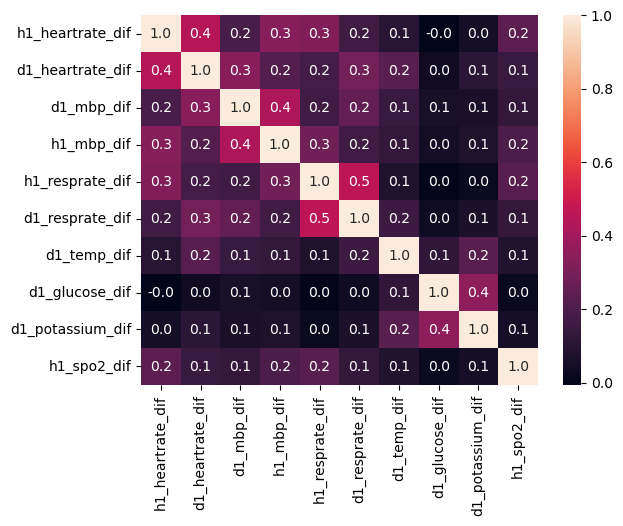

In [33]:
sns.heatmap(patient_data[dif].corr(), annot = True, fmt=".1f")

<Axes: >

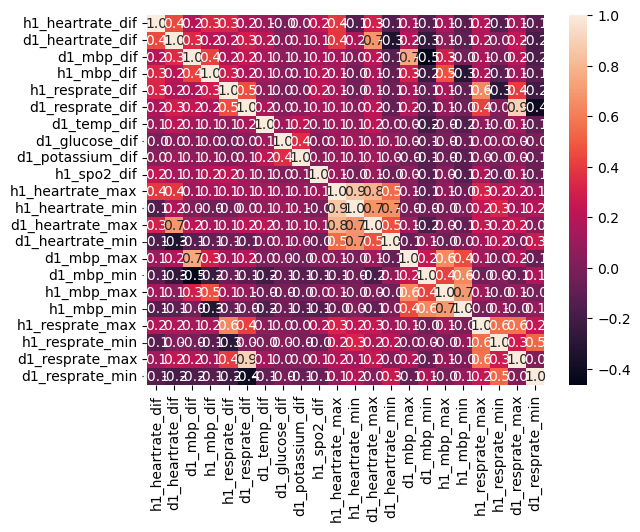

In [43]:
dif_derivatives = ['h1_heartrate_dif', 'd1_heartrate_dif', 'd1_mbp_dif', 'h1_mbp_dif','h1_resprate_dif',
                   'd1_resprate_dif', 'd1_temp_dif', 'd1_glucose_dif', 'd1_potassium_dif','h1_spo2_dif',
                  'h1_heartrate_max', 'h1_heartrate_min', 'd1_heartrate_max', 'd1_heartrate_min', 'd1_mbp_max', 
                   'd1_mbp_min','h1_mbp_max', 'h1_mbp_min', 'h1_resprate_max', 'h1_resprate_min', 
                   'd1_resprate_max', 'd1_resprate_min']
sns.heatmap(patient_data[dif_derivatives].corr(), annot = True, fmt=".1f")

In [25]:
pd.pivot_table(patient_data, index = 'hospital_death', values = a)

,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_resprate_max,d1_resprate_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_resprate_max,h1_resprate_min
hospital_death,,,,,,,,,,,,
0,101.898629,70.340707,104.758393,65.812145,28.543974,12.806358,91.465363,83.119277,92.003723,80.235894,22.351241,17.004324
1,114.679164,70.121976,103.516358,54.902993,32.475604,13.269632,100.276171,89.399403,87.507664,70.618790,25.607181,19.393479


In [21]:
pd.pivot_table(patient_data, index = 'hospital_death', values = apache)

,apache_2_diagnosis,apache_3j_diagnosis,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,apache_post_operative,arf_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,heart_rate_apache,intubated_apache,map_apache,resprate_apache,temp_apache,ventilated_apache
hospital_death,,,,,,,,,,,,,,,,
0,187.779488,571.101236,0.062882,0.024799,0.211413,0.026597,3.540316,5.581726,0.007987,4.109004,98.687170,0.132190,88.537985,25.409111,36.454504,0.292841
1,160.254274,421.149669,0.334838,0.242726,0.091977,0.042656,2.649222,4.273135,0.025937,2.756657,110.560763,0.353384,82.458478,30.075834,35.977758,0.674968


In [26]:
# provides averages of numerical relative to death or not
pd.pivot_table(patient_data, index = 'hospital_death', values = ['pre_icu_los_days', 'd1_temp_max', 'd1_temp_min', 'h1_heartrate_max',
                                                                 'h1_heartrate_min', 'd1_glucose_max', 'd1_glucose_min', 'd1_potassium_max',
                                                                 'd1_potassium_min', 'd1_mbp_max', 'd1_mbp_min', 'h1_spo2_max', 'h1_spo2_min',
                                                                 'd1_diasbp_max','d1_diasbp_min'
                                                                 ])

,d1_diasbp_max,d1_diasbp_min,d1_glucose_max,d1_glucose_min,d1_mbp_max,d1_mbp_min,d1_potassium_max,d1_potassium_min,d1_temp_max,d1_temp_min,h1_heartrate_max,h1_heartrate_min,h1_spo2_max,h1_spo2_min,pre_icu_los_days
hospital_death,,,,,,,,,,,,,,,
0,88.480278,50.895379,172.458791,114.028437,104.758393,65.812145,4.228471,3.93018,37.282871,36.315453,91.465363,83.119277,98.091454,95.395144,0.787357
1,88.614916,42.371512,197.580784,118.092056,103.516358,54.902993,4.495199,3.98184,37.298517,35.761698,100.276171,89.399403,97.548130,92.832273,1.348287


In [32]:
pd.pivot_table(patient_data, index = 'hospital_death', values = dif)

,d1_glucose_dif,d1_heartrate_dif,d1_mbp_dif,d1_potassium_dif,d1_resprate_dif,d1_temp_dif,h1_heartrate_dif,h1_mbp_dif,h1_resprate_dif,h1_spo2_dif
hospital_death,,,,,,,,,,
0,58.430354,31.557922,38.946249,0.298291,15.737617,0.967418,8.346086,11.767829,5.346917,2.696309
1,79.488728,44.557188,48.613365,0.513360,19.205972,1.536819,10.876767,16.888874,6.213701,4.715858


In [23]:
# is there any missing data on patient death. Ansswer is no
patient_data['hospital_death'].isna().any()

False

In [221]:
features = ['age', 'bmi', 'diabetes_mellitus', 'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma',
            'solid_tumor_with_metastasis', 'ethnicity', 'apache_4a_hospital_death_prob', 'pre_icu_los_days',
            'aids', 'cirrhosis', 'gender', 'elective_surgery', 'gcs_motor_apache', 'heart_rate_apache',
            'map_apache', 'gcs_verbal_apache', 'intubated_apache', 'resprate_apache', 'gcs_unable_apache',
            'arf_apache', 'ventilated_apache', 'icu_admit_source', 'icu_type', 'd1_mbp_dif', 'h1_mbp_dif',
            'h1_resprate_dif', 'd1_resprate_dif', 'd1_temp_dif', 'd1_glucose_dif', 'd1_potassium_dif',
            'h1_spo2_dif'
           ]

   #         
      #   
        #    
         #  
          
         #  'd1_mbp_dif', 'h1_mbp_dif','h1_resprate_dif',
          #         'd1_resprate_dif', 'd1_temp_dif', 'd1_glucose_dif', 'd1_potassium_dif','h1_spo2_dif']

In [222]:
# the fillna part helps the model recognize when information is missing
X = pd.get_dummies(patient_data[features]).fillna(-1)
y = patient_data['hospital_death']

In [223]:
print(X.columns)

Index(['age', 'bmi', 'diabetes_mellitus', 'hepatic_failure',
       'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis', 'apache_4a_hospital_death_prob',
       'pre_icu_los_days', 'aids', 'cirrhosis', 'elective_surgery',
       'gcs_motor_apache', 'heart_rate_apache', 'map_apache',
       'gcs_verbal_apache', 'intubated_apache', 'resprate_apache',
       'gcs_unable_apache', 'arf_apache', 'ventilated_apache', 'd1_mbp_dif',
       'h1_mbp_dif', 'h1_resprate_dif', 'd1_resprate_dif', 'd1_temp_dif',
       'd1_glucose_dif', 'd1_potassium_dif', 'h1_spo2_dif',
       'ethnicity_African American', 'ethnicity_Asian', 'ethnicity_Caucasian',
       'ethnicity_Hispanic', 'ethnicity_Native American',
       'ethnicity_Other/Unknown', 'gender_F', 'gender_M',
       'icu_admit_source_Accident & Emergency', 'icu_admit_source_Floor',
       'icu_admit_source_Operating Room / Recovery',
       'icu_admit_source_Other Hospital', 'icu_admit_source_Other ICU',
       'icu_ty

In [224]:
#Findings
# - Cannot have bmi and weight together in order to prevent collinearity.

# - I decided that there was no need to include the diastolic/systolic varoables if I am using the mean 
# blood pressure variable

# - There was no difference in 'd1_temp_max' according to the pivot table so I took it out

# - I added a potassium difference to get a better measure of the affect of the potassium variables

# - Based on the pivot table temp_apache appears to have minimal affect on death. After taking variable out 
# accuracy increased

# - gcs_eye_apache and gcs_motor_apache seem to be highly correlated with one another. To avoid multicollinearity I 
# took gcs_eye_apache out because it impacted the accuracy less than gcs_motor_apache

# - gcs_verbal_apache and ventilated_apache seem to be highly correlated with one another but after looking at the
# effect of accuracy with either of them out, the effect was minimal causing me to leave them in the model

# - apache_4a_hospital_death_prob and apache_4a_icu_death_prob seem to be highly correlated with one another. To avoid multicollinearity I 
# took apache_4a_icu_death_prob out because it impacted the accuracy less than gcs_motor_apache

# - there was no difference between 'd1_potassium_max' and 'd1_potassium_min' in survived and did not survive so I 
# took out of the model
                         
# - there was no difference between 'd1_heartrate_min in survived and did not survive so I it out of the model

# - there was no difference between 'd1_diasbp_max' in survived and did not survive so I it out of the model

# - I think it is probably best to use new variables that encapsulates the difference between mean and max. This 
# way I can take out more variables, make the model cleaner, and get more meaningful data

# -  after doing so I had to use a correlation plot to check for collinearity. Had to take out heart_rate max/min,
# d1_mpb_max/min,

# - After adding the new variables and running the model, it made no difference in the accuracy of the model. The
# accuracy of the model plateau'd at 88%

In [225]:
# This is the proper way to make a validation set with equal distributions as your training set
from sklearn.model_selection import train_test_split
# Split data into training and validation data , for both features and target
# The split is based on a random number generator. Supplying  numeric value to
# the random_state argument guarantees we get the same split every single time we
# run this script
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0, test_size = 0.1)

#y is synonymous with the targets

#Define Model
survival_model = DecisionTreeRegressor()

#fit model
survival_model.fit(train_X, train_y)

#Get predictions
val_predictions = survival_model.predict(val_X)




In [226]:
val_predictions

array([1., 1., 0., ..., 0., 0., 0.])

In [227]:
#Cross validation
score = cross_val_score(survival_model, X, y, cv=5, scoring='accuracy')
print('Accuracy%:\n', score)

Accuracy%:
 [0.87379382 0.87008668 0.86245434 0.87465925 0.88000218]


In [228]:
print('Average Accuracy score (across experimennts):')
print(score.mean())

Average Accuracy score (across experimennts):
0.8721992548812384
